## Load drug data with selected columns and good memory usage

In [136]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Load state drug data for 2008 - 2018

columns = ['State', 'Year', 'Product Name', 'Quarter']
filenames = ['State_Drug_Utilization_Data_' + str(i) + '.csv' for i in range(2008, 2019)]

df = pd.concat(pd.read_csv(filename, usecols=columns) 
               for filename in filenames)

In [79]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39752112 entries, 0 to 2365964
Data columns (total 4 columns):
State           object
Year            int64
Quarter         int64
Product Name    object
dtypes: int64(2), object(2)
memory usage: 5.5 GB


In [6]:
df.sample(5)

,State,Year,Quarter,Product Name
360913,CO,2013,4,OPANA ER 7
622639,FL,2012,4,SERTRALINE
923990,MN,2018,2,GABAPENTIN
476187,NM,2010,3,GAVILAX PO
2126434,CA,2015,1,LISINOPRIL


In [80]:
# Convert non-numeric columns to category to save memory

df[['State', 'Product Name', 'Quarter']] = df[['State',
                                               'Product Name', 
                                               'Quarter']].astype('category')

In [81]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39752112 entries, 0 to 2365964
Data columns (total 4 columns):
State           category
Year            int64
Quarter         category
Product Name    category
dtypes: category(3), int64(1)
memory usage: 837.4 MB


In [141]:
# TODO:
# 2. Do some frequency count plots
# 3. See which states use which drugs
# 4. Come up with some more questions

## Take care of the missing values in Product Name

In [99]:
# We have 3311 ?'s and 5854 NaNs

print((df['Product Name'] == '?').sum())
print(df.isna().sum())

# Replace ? with nan

df = df.replace('?', np.NaN)

3311
State              0
Year               0
Quarter            0
Product Name    5854
dtype: int64


In [100]:
df.isna().sum().sum()

9165

In [70]:
# Figure out what to do with the NaNs
# are they even relevant?

df.shape

# Nope, let's drop them

df['Product Name'].dropna(axis='index', inplace=True)

(39752112, 4)

In [103]:
# Just drop the nans, there aren't very many of them

df = df.dropna(subset=['Product Name'])
df.isna().sum().sum()

0


## What drugs are people on and why are they on them?

This dataset will let us see the types of drugs people are taking in the U.S. by state, year, and time of year.

In [105]:
# Pearson correlation only shows numeric

df.corr()

,Year
Year,1.0


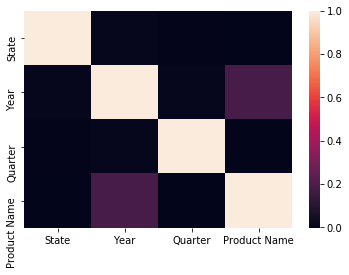

In [138]:
# Factorize into numbers for non-numeric correlations

sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr());

In [134]:
# Let's see the most used drugs by state

df.nlargest(20, 'Product Name')

TypeError: Column 'Product Name' has dtype category, cannot use method 'nlargest' with this dtype

In [130]:
df.nlargest?